<a href="https://colab.research.google.com/github/1rd0/cv/blob/main/sklearn_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans

## Лабораторная работа №3

Присвойте строку с вашим ФИО переменной `name` и выполните ячейку. В ее выводе будет указан номер вашего варианта.

In [ ]:
name = "Рабдел Дмитрий Александрович" # Впишите ваше ФИО

def calculate_variant(name):
    return sum(ord(char) for char in name) % 2 + 1

print(f"Ваш вариант - №{calculate_variant(name)}")


Ваш вариант - №2



---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО:Рабдел Дмитрий Александрович

Группа:

Вариант:2

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/kmeans-1.csv
1. http://labcolor.space/kmeans-2.csv

Скопируйте ссылку для своего варианта.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

## Чтение данных

Используя уже знакомый метод из библиотеки Pandas, считайте данные в формате csv по ссылке из вашего варианта в датафрейм.

Изучите ваш датасет: сколько в нем объектов, сколько признаков, в каких диапазонах изменяются признаки, есть ли в данных целевой признак.

In [ ]:
df=pd.read_csv('/content/kmeans-2.csv')

#
df.describe()



,370.0,372.4161073825503,374.8322147651007,377.248322147651,379.66442953020135,382.08053691275165,384.496644295302,386.9127516778523,389.3288590604027,391.744966442953,...,708.255033557047,710.6711409395973,713.0872483221476,715.5033557046979,717.9194630872483,720.3355704697987,722.7516778523491,725.1677852348994,727.5838926174497,730.0
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.979670,0.981397,0.984054,0.987103,0.990156,0.993836,0.998397,1.003042,1.008358,1.006987,...,1.001307,0.998017,0.994112,0.989741,0.986050,0.989658,0.991478,0.989219,0.987548,0.985849
std,0.736172,0.737652,0.739094,0.740929,0.743104,0.745420,0.747907,0.750496,0.753590,0.751772,...,0.788050,0.788410,0.789719,0.792078,0.794061,0.790729,0.786894,0.780644,0.775597,0.771149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244692,0.252491,0.261754,0.265595,0.267354,0.270092,0.275081,0.269697,0.272831,0.268470,...,0.264574,0.263102,0.260936,0.256628,0.254779,0.263538,0.269972,0.266905,0.264801,0.262116
50%,0.988965,0.991635,0.995020,0.998552,1.001024,1.004065,1.007607,1.011000,1.014308,1.010384,...,0.401366,0.399032,0.394822,0.383237,0.371835,0.375681,0.381975,0.391916,0.401895,0.411956
75%,1.678961,1.687208,1.699924,1.708823,1.712280,1.714856,1.724840,1.735440,1.746327,1.746842,...,1.811257,1.806093,1.806899,1.801259,1.794684,1.790806,1.790046,1.786441,1.782557,1.778888
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


TypeError: ignored

**Опишите ваши данные.**

Сколько в нем объектов: **80**

Сколько признаков: **150**

В каких диапазонах изменяются признаки: **[0;2]**

Есть ли в данных целевой признак: **нет**

## Кластеризация

Когда решалась задача классификации с помощью алгоритма knn в наших данных был целевой признак, по которому можно было определить количество классов. При решении задачи кластеризации мы заранее не имеем информации, по которой мы можем задать количество кластеров, поэтому пока при создании экземпляра объекта выберите количество кластеров до 20. Не забудьте задать `random_state`.

In [ ]:
# Импортируйте класс из соответствующего модуля библиотеки sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

kmeans = KMeans(n_clusters = 2,init = 'k-means++',random_state = 42)  # Ваш код
kmeans.fit(df)  # Ваш код





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

Опишите своими словами за что отвечают параметры:

n_clusters - **Количество центройдов**

init - **инициализирует центроиды (как правило) удаленными друг от друга**

n_init - **Сколько раз алгоритм k-средних запускается с разными начальными значениями центроида**

max_iter - **Максимальное количество итераций за один прообег**

random_state - **Чтобы были одинаковые вычисления**

После выполнения метода `.fit()` у экземпляра оценщика (estimator) доступны атрибуты `labels_` и `inertia_`.

`labels_` - массив с указаниями индексов кластеров для всех ваших объектов.

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ:**

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)

# Вывод результатов
for label, count in zip(unique_labels, counts):
    print(f'Кластер {label}: {count} объектов')

Кластер 0: 16 объектов
Кластер 1: 24 объектов
Кластер 2: 18 объектов
Кластер 3: 22 объектов


`inertia_` для KMeans это SSD (Sum of squared distances - сумма квадратов расстояний) или по-другому это еще называют SSE (Sum of Squares Error - сумма квадратов ошибки.)

Если SSD это сумма квадратов расстояний, то между чем и чем рассчитываются расстояния?

**это означает, что это сумма квадратов расстояний от каждой точки данных до центроида ее кластера. Это значение часто используется для оценки того, насколько хорошо прошла кластеризация: чем меньше inertia_, тем лучше.т**:

In [ ]:
# Выведите значение суммы квадратов расстоянияний для вашей модели

#
kmeans.inertia_
#

3939.467849751149

## Подбор количества кластеров

Для подбора оптимального количества кластеров мы воспользуемся графическим методом - "методом локтя" (Elbow Method). Для этого мы создаем множество моделей с разным количеством кластеров, "подгоняем" (fit) их и оцениваем SSD.

Гипотеза, которая позволяет использовать данный метод, заключается в том, что центройд является прототипом кластера, а следовательно объекты должны кучнее располагаться к нему, поэтому сумма квадратов расстояний должна быть меньше.

** *italicized text*А в каком случае для k средних (KMeans) оцениваемые расстояния равны 0?**

**сли случайно выбранная начальная точка для центроида совпадает с какой-то точкой данных, то после первого шага кластеризации эта точка будет отнесена к своему собственному кластеру, и центроид этого кластера также будет совпадать с этой точкой. В результате такой ситуации сумма квадратов ошибок (SSE) для этого кластера будет равна 0**

Теперь ваша задача в цикле создать n моделей и записать их критерий (сумму квадратов расстояний) в словарь (dict).

In [ ]:
SSE = {}

for k in np.arange(2,20 ):  # # Ваш код: в arange укажите в качестве начального значения 2, а конечного число до 20.
  cluster = KMeans(n_clusters =k,init = 'k-means++',random_state = 42)  # Ваш код
  cluster.fit(df)  # Ваш код
  SSE[k] = cluster.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Построим график для оценки, где по оси абсцисс указано количество кластеров, а по оси ординат указано значение, которое описывает сумму квадратов расстояний.

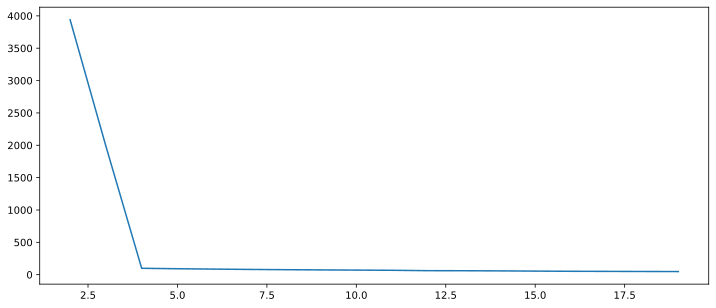

In [ ]:
lists = SSE.items()
x, y = zip(*lists)

plt.plot(x, y)
plt.show()

Теперь по графику найдите число кластеров, начиная с которого критерий SSD снижается не так быстро.

Получившееся число кластеров - **4**.

## Итоговая модель

In [ ]:
model = KMeans(n_clusters =4,init = 'k-means++',random_state = 42)
model.fit(df)
model.inertia_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


98.51894509105277

Используя `labels_`, посчитайте сколько объектов относится к каждому кластеру.

**Сколько объектов относится к каждому кластеру?**

**Ваш ответ**

In [ ]:
unique_labels, counts = np.unique(model.labels_, return_counts=True)

# Вывод результатов
for label, count in zip(unique_labels, counts):
    print(f'Кластер {label}: {count} объектов')

Кластер 0: 24 объектов
Кластер 1: 7 объектов
Кластер 2: 11 объектов
Кластер 3: 16 объектов
Кластер 4: 11 объектов
Кластер 5: 11 объектов


**Кратко опишите суть алгоритма KMeans.**

**Ваш ответ:**

Инициализация центроидов:

1.Выбираются случайные точки данных в качестве начальных центроидов для каждого кластера.


2.Каждая точка данных присваивается к ближайшему центроиду.
Таким образом, формируются кластеры.


Пересчет центроидов:

2.1 Центроид каждого кластера пересчитывается как среднее значение точек внутри этого кластера.

2.2 Это обновление центроидов делает их более репрезентативными для точек внутри кластера.

3.Шаги 2 и 3 повторяются до тех пор, пока центроиды не перестанут значительно изменяться или пока не будет достигнуто максимальное количество итераций.

Результат:
Когда алгоритм завершает работу, есть набор кластеров, и каждая точка данных отнесена к одному из них.
